In [1]:
import os
import math
from sympy import *
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit, least_squares
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import matplotlib.pyplot as plt
import lmfit

In [2]:
def load_csv_data(file_name, subdir=''):
    """
    Loads data from .csv file in to DataFrame

    :param file_name: .csv file name in string
    :param subdir: optional parameter to specify the subdirectory of the file
    :return: extracted data in DataFrame
    """

    file_dir = os.path.realpath('../')
    print(file_dir)
    for root, dirs, files in os.walk(file_dir):
        if root.endswith(subdir):
            for name in files:
                if name == file_name:
                    file_path = os.path.join(root, name)

    df = pd.read_csv(file_path)

    return df

In [3]:
def LF_Noise(component = 1):
    """ Inital parameters and bounds for each paramter according to LF (0-0.01Hz)in the paper
    """
    LMparams = Parameters()

    # The code below is to load the initial paramters if we are running the NLLSR on all 3 components at once

    LMparams.add('A1_FS', value = 10.)
    LMparams.add('A2_FS', value = 10.)
    LMparams.add('A3_FS', value = 10.)
    LMparams.add('w1_FS', value = 0, min = 0, max = 0.01*2*math.pi)
    LMparams.add('w2_FS', value = 0.005*2*math.pi, min = 0, max = 0.01*2*math.pi)
    LMparams.add('w3_FS', value = 0.01*2*math.pi, min = 0, max = 0.01*2*math.pi)
    LMparams.add('phi1_FS', value = 0, min = -math.pi, max = math.pi)
    LMparams.add('phi2_FS', value = 0, min = -math.pi, max = math.pi)
    LMparams.add('phi3_FS', value = 0, min = -math.pi, max = math.pi)

    # The code below is to load the initial paramters if we are running the NLLSR on one component at a time

    # if component == 1:
    #     LMparams.add('A_FS', value = 10.)
    #     LMparams.add('w_FS', value = 0, min = 0, max = 0.01*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)
    # elif component == 2:
    #     LMparams.add('A_FS', value = 10.)
    #     LMparams.add('w_FS', value = 0.005*2*math.pi, min = 0, max = 0.01*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)
    # elif component == 3:
    #     LMparams.add('A_FS', value = 10.)
    #     LMparams.add('w_FS', value = 0.01*2*math.pi, min = 0, max = 0.01*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)

    return LMparams

def MF_Noise(component = 1):
    """ Inital parameters and bounds for each paramter according to MF (0.01-0.25Hz) in the paper
    """
    LMparams = Parameters()

    # The code below is to load the initial paramters if we are running the NLLSR on all 3 components at once

    LMparams.add('A1_FS', value = 10.)
    LMparams.add('A2_FS', value = 10.)
    LMparams.add('A3_FS', value = 10.)
    LMparams.add('w1_FS', value = 0.02*2*math.pi, min = 0.01*2*math.pi, max = 0.25*2*math.pi)
    LMparams.add('w2_FS', value = 0.03*2*math.pi, min = 0.01*2*math.pi, max = 0.25*2*math.pi)
    LMparams.add('w3_FS', value = 0.03*2*math.pi, min = 0.01*2*math.pi, max = 0.25*2*math.pi)
    LMparams.add('phi1_FS', value = 0, min = -math.pi, max = math.pi)
    LMparams.add('phi2_FS', value = 0, min = -math.pi, max = math.pi)
    LMparams.add('phi3_FS', value = 0, min = -math.pi, max = math.pi)

    # The code below is to load the initial paramters if we are running the NLLSR on one component at a time

    # if component == 1:
    #     LMparams.add('A_FS', value = 10.)
    #     LMparams.add('w_FS', value = 0.02*2*math.pi, min = 0.01*2*math.pi, max = 0.25*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)
    # elif component == 2:
    #     LMparams.add('A_FS', value = 10.)
    #     LMparams.add('w_FS', value = 0.03*2*math.pi, min = 0.01*2*math.pi, max = 0.25*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)
    # elif component == 3:
    #     LMparams.add('A_FS', value = 10.)
    #     LMparams.add('w_FS', value = 0.03*2*math.pi, min = 0.01*2*math.pi, max = 0.25*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)

    return LMparams

def HF_Noise(component = 1):
    """ Inital parameters and bounds for each paramter according to HF (0.25-0.5Hz) in the paper
    """
    LMparams = Parameters()

    # The code below is to load the initial paramters if we are running the NLLSR on all 3 components at once

    LMparams.add('A1_FS', value = 1.)
    LMparams.add('A2_FS', value = 1.)
    LMparams.add('A3_FS', value = 1.)
    LMparams.add('w1_FS', value = 0.25*2*math.pi, min = 0.25*2*math.pi, max = 0.5*2*math.pi)
    LMparams.add('w2_FS', value = 0.375*2*math.pi, min = 0.25*2*math.pi, max = 0.5*2*math.pi)
    LMparams.add('w3_FS', value = 0.5*2*math.pi, min = 0.25*2*math.pi, max = 0.5*2*math.pi)
    LMparams.add('phi1_FS', value = 0, min = -math.pi, max = math.pi)
    LMparams.add('phi2_FS', value = 0, min = -math.pi, max = math.pi)
    LMparams.add('phi3_FS', value = 0, min = -math.pi, max = math.pi)

    # The code below is to load the initial paramters if we are running the NLLSR on one component at a time

    # if component == 1:
    #     LMparams.add('A_FS', value = 1.)
    #     LMparams.add('w_FS', value = 0.25*2*math.pi, min = 0.25*2*math.pi, max = 0.5*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)
    # elif component == 2:
    #     LMparams.add('A_FS', value = 1.)
    #     LMparams.add('w_FS', value = 0.375*2*math.pi, min = 0.25*2*math.pi, max = 0.5*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)
    # elif component == 3:
    #     LMparams.add('A_FS', value = 1.)
    #     LMparams.add('w_FS', value = 0.5*2*math.pi, min = 0.25*2*math.pi, max = 0.5*2*math.pi)
    #     LMparams.add('phi_FS', value = 0, min = -math.pi, max = math.pi)

    return LMparams

In [ ]:
class DS(object):
    """ Module 2: Drive Scenario
    """
    def __init__(self):
        

In [ ]:
class DC(object):
    """ Module 1: Drive Cycle
    """
    def __init__(self, dc_length):
        
        t_DC = dc_length
        sum_t_DS = 0
        while t_DC > sum_t_DS:
            pass
        pass


In [4]:
class Acceleration(object):
    def __init__(self):
        # self.bins = pd.DataFrame([0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2])
        # self.data_points = pd.DataFrame([1,4,12,24,20,29,9,1,0,0])
        self.bins = pd.DataFrame(np.linspace(0.1, 2.098, num=1000))
        self.data_points = pd.DataFrame(np.repeat([1,4,12,24,20,29,9,1,0,0],100))

In [5]:
class Cruising_Duration(object):
    def __init__(self):
        # self.bins = pd.DataFrame([0,12,24,36,48,60,72,84,96,108,120])
        # data_points = pd.DataFrame([3,14,28,26,12,7,2,4,3,0,1])
        self.bins = pd.DataFrame(np.linspace(-6, 125.88, num=1100))
        self.data_points = pd.DataFrame(np.repeat([3,14,28,26,12,7,2,4,3,0,1],100))

In [6]:
class Average_Crusing_Speed(object):
    def __init__(self):
        # self.bins = pd.DataFrame([2,4,6,8,10,12,14,16,18,20])
        # self.data_points = pd.DataFrame([0,1,2,6,18,35,22,11,4,1])
        self.bins = pd.DataFrame(np.linspace(1, 20.98, num=1000))
        self.data_points = pd.DataFrame(np.repeat([0,1,2,6,18,35,22,11,4,1],100))

In [7]:
class Deceleration(object):
    def __init__(self):
        # self.bins = pd.DataFrame([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5])
        # self.data_points = pd.DataFrame([0,0,6,14,22,20,16,13,6,3])
        self.bins = pd.DataFrame(np.linspace(-0.25, 4.745, num=1000))
        self.data_points = pd.DataFrame(np.repeat([0,0,6,14,22,20,16,13,6,3],100))        

In [8]:
def Gaussian_param():
    """ Inital parameters for each Gaussian characteristic paramter 
    """
    LMparams = Parameters()
    # there are two sets of values because the paper used 2 curve (n=2) to fit the distributions
    LMparams.add('alpha_1', value = 1., min = 0)
    LMparams.add('alpha_2', value = 1., min = 0)
    LMparams.add('sigma_1', value = 1., min = 0)
    LMparams.add('sigma_2', value = 1., min = 0)
    LMparams.add('meu_1', value = 1., min = 0)
    LMparams.add('meu_2', value = 1., min = 0)

    return LMparams

In [9]:
class Probability_Functions(object):
    def __init__(self, x, y, n):
        self.x = x
        self.y = y
        self.original_y = y
        # the number of Gaussian distribution used to describe the data
        self.n = n

    def single_component(self, alpha_i, sigma_i, meu_i):
        """ Returns the single Gaussian component as described in the sum of eqn (10)
        """
        exp_component = -((self.x - meu_i)**2)/(2*(sigma_i**2))
        fcn = (alpha_i/(sigma_i*math.sqrt(2*math.pi)))*np.exp(exp_component)
        return fcn

    def eqn_model(self, params):
        """ Returns the Gaussian component sum as described in eqn (10)
        """
        # runs a loop for the number of of Gaussian distibutions used to describe the data, and sums the single components 
        for component in range(1,self.n+1):
            alpha_i = 'alpha_'+str(component)
            sigma_i = 'sigma_'+str(component)
            meu_i = 'meu_'+str(component)
            if component == 1:
                model = self.single_component(params[alpha_i],params[sigma_i],params[meu_i])
            else:
                model += self.single_component(params[alpha_i],params[sigma_i],params[meu_i])

        return model

    def fnc2min(self, params):
        """ Returns the residuals for the model
        """
        return (self.y - self.eqn_model(params))

    def NLLSR(self, LMparams):
        """ Returns the result of the NLLSR using LMFit
        """
        # uses least swuares method to minimize the parameters given by LMparams according to the residuals given by self.fnc2min
        LMFitmin = Minimizer(self.fnc2min, LMparams)
        LMFitResult = LMFitmin.minimize(method='least_squares')
        lmfit.printfuncs.report_fit(LMFitResult.params)

        return LMFitResult

    def cdf(self, x, params):

        for component in range(1,self.n+1):
            alpha_i = 'alpha_'+str(component)
            sigma_i = 'sigma_'+str(component)
            meu_i ='meu_'+str(component)

            erf_param = (x - params[meu_i])/(params[sigma_i] * math.sqrt(2))
            if component == 1:
                answer =  params[alpha_i] * (1 + math.erf(erf_param))
            else:
                answer +=  params[alpha_i] * (1 + math.erf(erf_param))
        total = 0.5 * answer

        return total

    def inv_cdf(self, input):
        pass

    def normalised_cdf(self,normalised_x, LMparams):
        lim_inf_cdf = self.cdf(math.inf, LMparams)
        answer = self.cdf(normalised_x, LMparams)*lim_inf_cdf

        return answer

    

In [17]:
x = 0.83011822
erf_param = (x - 0.83011822)/(0.21988047 * math.sqrt(2))
print(erf_param)
answer =  12.5916156 * (1 + math.erf(erf_param))
print(answer)

x = math.inf
erf_param = (x - 0.83011822)/(0.21988047 * math.sqrt(2))
print(erf_param)
lim =  12.5916156 * (1 + math.erf(erf_param))
print(answer/lim)

0.0
12.5916156
inf
0.5


In [18]:
from sympy import *
x = Symbol('x')
print(accel_prob_obj.cdf(x, hey.params))

TypeError: can't convert expression to float

         0
0    0.100
1    0.102
2    0.104
3    0.106
4    0.108
..     ...
995  2.090
996  2.092
997  2.094
998  2.096
999  2.098

[1000 rows x 1 columns]
[[Variables]]
    alpha_1:  12.5916156 +/- 0.32223837 (2.56%) (init = 1)
    alpha_2:  6.67823047 +/- 0.28907744 (4.33%) (init = 1)
    sigma_1:  0.21988047 +/- 0.00569258 (2.59%) (init = 1)
    sigma_2:  0.10896580 +/- 0.00271271 (2.49%) (init = 1)
    meu_1:    0.83011822 +/- 0.00645074 (0.78%) (init = 1)
    meu_2:    1.21683793 +/- 0.00265665 (0.22%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(alpha_1, sigma_1) =  0.911
    C(alpha_1, alpha_2) = -0.910
    C(alpha_2, meu_1)   = -0.905
    C(alpha_2, sigma_1) = -0.876
    C(alpha_1, meu_1)   =  0.838
    C(alpha_2, sigma_2) =  0.837
    C(sigma_1, meu_1)   =  0.799
    C(sigma_2, meu_1)   = -0.743
    C(meu_1, meu_2)     =  0.738
    C(alpha_1, sigma_2) = -0.735
    C(alpha_1, meu_2)   =  0.717
    C(alpha_2, meu_2)   = -0.712
    C(sigma_1, sigma_2) 

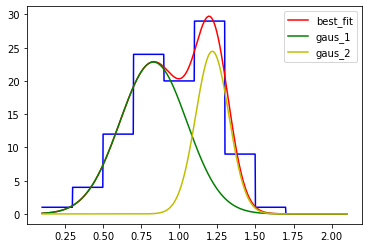

5.610316879512833


In [13]:
#create object storing histogram datapoints
accel_obj = Acceleration()
print(accel_obj.bins)
#load initial gaussian parameters
param_obj = Gaussian_param()
#create a probability function object for acceleration with its acceleration histogram data
accel_prob_obj = Probability_Functions(accel_obj.bins, accel_obj.data_points,2)
#fit the histogram
hey = accel_prob_obj.NLLSR(param_obj)

#plot the histogram, each gaussian component and the combined gaussian curve
plt.plot(accel_prob_obj.x,accel_prob_obj.original_y,'b')
yy = accel_prob_obj.eqn_model(hey.params)
gaus_1 = accel_prob_obj.single_component(hey.params['alpha_1'],hey.params['sigma_1'],hey.params['meu_1'])
gaus_2 = accel_prob_obj.single_component(hey.params['alpha_2'],hey.params['sigma_2'],hey.params['meu_2'])
plt.plot(accel_prob_obj.x, yy,'r', label = 'best_fit')
plt.plot(accel_prob_obj.x, gaus_1,'g', label = 'gaus_1')
plt.plot(accel_prob_obj.x, gaus_2,'y', label = 'gaus_2')
plt.legend(loc='best')
plt.show()

print(accel_prob_obj.cdf(0.8, hey.params))

In [ ]:
#create object storing histogram datapoints
cd_obj = Cruising_Duration()
print(cd_obj.bins)
#load initial gaussian parameters
param_obj = Gaussian_param()
#create a probability function object for acceleration with its acceleration histogram data
cd_prob_obj = Probability_Functions(cd_obj.bins, cd_obj.data_points,2)
#fit the histogram
hey = cd_prob_obj.NLLSR(param_obj)

#plot the histogram, each gaussian component and the combined gaussian curve
plt.plot(cd_prob_obj.x,cd_prob_obj.original_y,'b')
yy = cd_prob_obj.eqn_model(hey.params)
gaus_1 = cd_prob_obj.single_component(hey.params['alpha_1'],hey.params['sigma_1'],hey.params['meu_1'])
gaus_2 = cd_prob_obj.single_component(hey.params['alpha_2'],hey.params['sigma_2'],hey.params['meu_2'])
plt.plot(cd_prob_obj.x, yy,'r', label = 'best_fit')
plt.plot(cd_prob_obj.x, gaus_1,'g', label = 'gaus_1')
plt.plot(cd_prob_obj.x, gaus_2,'y', label = 'gaus_2')
plt.legend(loc='best')
plt.show()

In [ ]:
#create object storing histogram datapoints
avg_cs_obj = Average_Crusing_Speed()
print(avg_cs_obj.bins)
#load initial gaussian parameters
param_obj = Gaussian_param()
#create a probability function object for acceleration with its acceleration histogram data
avg_cs_prob_obj = Probability_Functions(avg_cs_obj.bins, avg_cs_obj.data_points,2)
#fit the histogram
hey = avg_cs_prob_obj.NLLSR(param_obj)

#plot the histogram, each gaussian component and the combined gaussian curve
plt.plot(avg_cs_prob_obj.x,avg_cs_prob_obj.original_y,'b')
yy = avg_cs_prob_obj.eqn_model(hey.params)
gaus_1 = avg_cs_prob_obj.single_component(hey.params['alpha_1'],hey.params['sigma_1'],hey.params['meu_1'])
gaus_2 = avg_cs_prob_obj.single_component(hey.params['alpha_2'],hey.params['sigma_2'],hey.params['meu_2'])
plt.plot(avg_cs_prob_obj.x, yy,'r', label = 'best_fit')
plt.plot(avg_cs_prob_obj.x, gaus_1,'g', label = 'gaus_1')
plt.plot(avg_cs_prob_obj.x, gaus_2,'y', label = 'gaus_2')
plt.legend(loc='best')
plt.show()

In [ ]:
#create object storing histogram datapoints
decel_obj = Deceleration()
print(decel_obj.bins)
#load initial gaussian parameters
param_obj = Gaussian_param()
#create a probability function object for deceleration with its deceleration histogram data
decel_prob_obj = Probability_Functions(decel_obj.bins, decel_obj.data_points,2)
#fit the histogram
hey = decel_prob_obj.NLLSR(param_obj)

#plot the histogram, each gaussian component and the combined gaussian curve
plt.plot(decel_prob_obj.x,decel_prob_obj.original_y,'b')
yy = decel_prob_obj.eqn_model(hey.params)
gaus_1 = decel_prob_obj.single_component(hey.params['alpha_1'],hey.params['sigma_1'],hey.params['meu_1'])
gaus_2 = decel_prob_obj.single_component(hey.params['alpha_2'],hey.params['sigma_2'],hey.params['meu_2'])
plt.plot(decel_prob_obj.x, yy,'r', label = 'best_fit')
plt.plot(decel_prob_obj.x, gaus_1,'g', label = 'gaus_1')
plt.plot(decel_prob_obj.x, gaus_2,'y', label = 'gaus_2')
plt.legend(loc='best')
plt.show()

In [ ]:
class Velocity_Noise(object):
    def __init__(self,t,y):
        self.t = t
        self.y = y
        self.original_y = y
        self.original_y_mean = self.original_y.mean()

    def subtract_avg(self):
        """Removes the average speed from the observations
        """
        self.y = self.y - self.original_y_mean
        return self.y

    def subtract(self, array):
        self.y = self.y - array
        return self.y

    def single_component(self, A_i_FS, w_i_FS, phi_i_FS):
        """ Returns a single velocity noise component as described in the sum of eqn (5)
        """
        return A_i_FS * np.sin( (w_i_FS*self.t) + phi_i_FS )
     
    def eqn_model(self, params):
        """ Returns the velocity noise FS model as described in eqn (5)
        """
        # put all the paramters in a list
        A_FS = [params['A1_FS'],params['A2_FS'],params['A3_FS']]
        w_FS = [params['w1_FS'],params['w2_FS'],params['w3_FS']]
        phi_FS = [params['phi1_FS'],params['phi2_FS'],params['phi3_FS']]

        # equation (5), sum of 3 components
        model = self.single_component(A_FS[0],w_FS[0], phi_FS[0])
        model += self.single_component(A_FS[1],w_FS[1], phi_FS[1])
        model += self.single_component(A_FS[2],w_FS[2], phi_FS[2])

        return model

    def fnc2min(self, params):
        """ Returns the residuals (eqn 7) for the model for when running all 3 components at once
        """
        return (self.y - self.eqn_model(params))

    # def fnc2min(self, params):
    #     """ Returns the residuals (eqn 7) for the model for when running one component at a time
    #     """
    #     return (self.y - self.single_component(params['A_FS'], params['w_FS'], params['phi_FS']))


    def NLLSR(self, LMparams):
        """ Returns the result of the NLLSR using LMFit
        """
        # uses least swuares method to minimize the parameters given by LMparams according to the residuals given by self.fnc2min
        LMFitmin = Minimizer(self.fnc2min, LMparams)
        LMFitResult = LMFitmin.minimize(method='least_squares')
        lmfit.printfuncs.report_fit(LMFitResult.params)

        return LMFitResult

In [ ]:
class DP(object):
    """ Module 3: Drive Pulse
    """
    def __init__(self,t,y):
        # velocity_noise = None
        # accel = None
        # cruise = None
        # decel = None
        # idle = None
        # t_DP = None
        self.t = t
        self.y = y


# The code below is for when we are balancing all 3 components of a Frequency Spectrum (FS) at ONCE
## Each block corresponds to one FS

In [ ]:
if __name__ == '__main__':
    # loads the csv file
    subdir = 'caltrans_processed_drive_cycles/data/1035198_1'
    file_name = '2012-05-22.csv'
    data = load_csv_data(file_name, subdir)
    # get a slice of the data with a relatively long driving pulse
    data = data.iloc[1002:1096,:]
    # show the slice of data
    plt.plot(data.loc[:,'timestamp'], data.loc[:,'speed_mph'])
    plt.show()
    # get the slice of ONLY cruising period
    cruising_data = data.iloc[25:86,:]

    # create a numpy array of just t values starting at t=1
    t = np.linspace(1,len(cruising_data),len(cruising_data))
    # create a numpy array of speed_mph values
    y = cruising_data.loc[:,'speed_mph'].to_numpy()
    # initialise the DP object
    vn_obj = Velocity_Noise(t,y)
    # deduct the average from the cruising period speed values (from fig3a to fig3b) and store as y
    y = vn_obj.subtract_avg()

    original_y = y
    
    # perform NLLSR with the initial parameters suggested by LMParams
    hi = vn_obj.NLLSR(LF_Noise())
    plt.plot(t,y,'b')
    yy = hi.params['A1_FS'] * np.sin( (hi.params['w1_FS']*t) + hi.params['phi1_FS'])
    yy = yy + hi.params['A2_FS'] * np.sin( (hi.params['w2_FS']*t) + hi.params['phi2_FS'])
    yy = yy + hi.params['A3_FS'] * np.sin( (hi.params['w3_FS']*t) + hi.params['phi3_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of LF spectrum
    y = vn_obj.subtract(yy)
    reconstructed = yy


In [ ]:
    # perform NLLSR with the initial parameters suggested by LMParams
    hi2 = vn_obj.NLLSR(MF_Noise())

    plt.plot(t,y,'b')
    yy = hi2.params['A1_FS'] * np.sin( (hi2.params['w1_FS']*t) + hi2.params['phi1_FS'])
    yy = yy + hi2.params['A2_FS'] * np.sin( (hi2.params['w2_FS']*t) + hi2.params['phi2_FS'])
    yy = yy + hi2.params['A3_FS'] * np.sin( (hi2.params['w3_FS']*t) + hi2.params['phi3_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of LF spectrum
    y = vn_obj.subtract(yy)
    reconstructed += yy

In [ ]:
    # perform NLLSR with the initial parameters suggested by LMParams
    hi3 = vn_obj.NLLSR(HF_Noise())
    plt.plot(t,y,'b')
    yy = hi3.params['A1_FS'] * np.sin( (hi3.params['w1_FS']*t) + hi3.params['phi1_FS'])
    yy = yy + hi3.params['A2_FS'] * np.sin( (hi3.params['w2_FS']*t) + hi3.params['phi2_FS'])
    yy = yy + hi3.params['A3_FS'] * np.sin( (hi3.params['w3_FS']*t) + hi3.params['phi3_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')hd t5 .
    plt.show()
    # remove previous component of LF spectrum
    y = vn_obj.subtract(yy)
    reconstructed += yy

    plt.plot(t,original_y,'b')
    plt.plot(t, reconstructed,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()



# The code below is for when we are running one component at once 
## Each block is for one Frequency Spectrum

In [ ]:
if __name__ == '__main__':
    # loads the csv file
    subdir = 'caltrans_processed_drive_cycles/data/1035198_1'
    file_name = '2012-05-22.csv'
    data = load_csv_data(file_name, subdir)
    # get a slice of the data with a relatively long driving pulse
    data = data.iloc[1002:1096,:]
    plt.plot(data.loc[:,'timestamp'], data.loc[:,'speed_mph'])
    plt.show()
    # get the slice of ONLY cruising period
    cruising_data = data.iloc[25:86,:]

    # create a numpy array of just t values starting at t=1
    t = np.linspace(1,len(cruising_data),len(cruising_data))
    # create a numpy array of speed_mph values
    y = cruising_data.loc[:,'speed_mph'].to_numpy()
    # initialise the DP object
    vn_obj = Velocity_Noise(t,y)
    # deduct the average from the cruising period speed values (from fig3a to fig3b) and store as y
    y = vn_obj.subtract_avg()

    original_y = y
    
    # perform NLLSR with the initial parameters suggested by LMParams
    hi = vn_obj.NLLSR(LF_Noise(1))
    plt.plot(t,y,'b')
    yy = vn_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of LF spectrum
    y = vn_obj.subtract(yy)
    reconstructed = yy

    # perform NLLSR with the initial parameters suggested by LMParams
    hi = vn_obj.NLLSR(LF_Noise(2))
    plt.plot(t,y,'b')
    yy = vn_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of LF spectrum
    y = vn_obj.subtract(yy)
    reconstructed += yy

    # perform NLLSR with the initial parameters suggested by LMParams
    hi = vn_obj.NLLSR(LF_Noise(3))
    plt.plot(t,y,'b')
    yy = vn_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of LF spectrum
    y = vn_obj.subtract(yy)
    reconstructed += yy


In [ ]:
    # perform NLLSR with the initial parameters suggested by LMParams
    hi = vn_obj.NLLSR(MF_Noise(1))
    plt.plot(t,y,'b')
    yy = vn_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of MF spectrum
    y = vn_obj.subtract(yy)
    reconstructed += yy

    # perform NLLSR with the initial parameters suggested by LMParams
    hi = vn_obj.NLLSR(MF_Noise(2))
    plt.plot(t,y,'b')
    yy = vn_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of MF spectrum
    y = vn_obj.subtract(yy)
    reconstructed += yy

    # perform NLLSR with the initial parameters suggested by LMParams
    hi = vn_obj.NLLSR(MF_Noise(3))
    plt.plot(t,y,'b')
    yy = vn_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of MF spectrum
    y = vn_obj.subtract(yy)
    reconstructed += yy

In [ ]:
    # perform NLLSR with the initial parameters suggested by LMParams
    hi = vn_obj.NLLSR(HF_Noise(1))
    plt.plot(t,y,'b')
    yy = vn_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of HF spectrum
    y = vn_obj.subtract(yy)
    reconstructed += yy

    # perform NLLSR with the initial parameters suggested by LMParams
    hi = vn_obj.NLLSR(HF_Noise(2))
    plt.plot(t,y,'b')
    yy = vn_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of HF spectrum
    y = vn_obj.subtract(yy)
    reconstructed += yy

    # perform NLLSR with the initial parameters suggested by LMParams
    hi = vn_obj.NLLSR(HF_Noise(3))
    plt.plot(t,y,'b')
    yy = vn_obj.single_component(hi.params['A_FS'],hi.params['w_FS'],hi.params['phi_FS'])
    plt.plot(t, yy,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
    # remove previous component of HF spectrum
    y = vn_obj.subtract(yy)
    reconstructed += yy

    plt.plot(t,original_y,'b')
    plt.plot(t, reconstructed,'r', label = 'best_fit')
    plt.legend(loc='best')
    plt.show()
